In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from PhysPropWater import rho
from sklearn.preprocessing import MinMaxScaler

In [82]:
torch.manual_seed(42)
np.random.seed(42)

scaler = MinMaxScaler()

#x = torch.tensor(rho[:,0], dtype=torch.float32).reshape(-1, 1)
#print(x)
X_scaled = scaler.fit_transform(rho[:,0].reshape(-1, 1))
y_scaled = scaler.fit_transform(rho[:,1].reshape(-1, 1))
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_scaled_tensor = torch.tensor(y_scaled, dtype=torch.float32)

In [83]:
class ModelA(nn.Module):
    def __init__(self):
        super(ModelA, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 1)    
        )
        
    def forward(self, x):
        return self.model(x)

class ModelB(nn.Module):
    def __init__(self):
        super(ModelB, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            
            nn.Linear(10, 1)
        )
        
    def forward(self, x):
        return self.model(x)

In [84]:
# Data
X = torch.tensor(X_scaled_tensor, dtype=torch.float32)
y = torch.tensor(y_scaled_tensor, dtype=torch.float32)

#print(f"X.shape = {X.shape}")
#print(f"X: {X}")
#print(f"y: {y}")

C:\Users\olofs\AppData\Local\Temp\ipykernel_11312\468604007.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X_scaled_tensor, dtype=torch.float32)
C:\Users\olofs\AppData\Local\Temp\ipykernel_11312\468604007.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y_scaled_tensor, dtype=torch.float32)


In [85]:
#model = ModelA() 
model = ModelB()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [86]:
# Train the model

EPOCS = 5000
losses = []  # List to store loss values for each epoch

print("Starting training...")

for epoch in range(EPOCS):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    
    # Print the loss every 500 epochs to monitor training
    if epoch % 500 == 0:
        print(f"Epoch {epoch}/{EPOCS} - Loss: {loss.item()}")

    if epoch > 20 and (losses[-20] - losses[-1])/len(losses[-20:-1]) < 1e-5:
        print(f"Model converged after {epoch} epochs\nLoss: {loss.item()}\nDerivative: {losses[-10] / losses[-1]}")
        break


print("Training completed.")

Starting training...
Epoch 0/5000 - Loss: 0.6507376432418823
Model converged after 352 epochs
Loss: 0.0007218304672278464
Derivative: 1.1145726461506629
Training completed.


In [87]:
# Predictions
xpred = torch.linspace(0, 1, 120).view(-1, 1)
ypred = model(xpred).detach().numpy()
print("Predictions completed for xpred values.")

Predictions completed for xpred values.


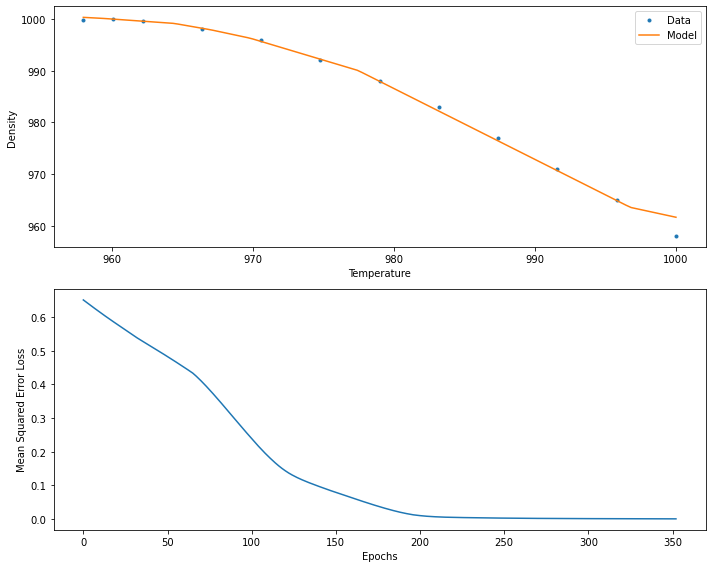

Parameter containing:
tensor([[ 0.7853],
        [ 0.9351],
        [-0.1957],
        [ 0.9013],
        [-0.4069],
        [ 0.4571],
        [-0.5793],
        [ 0.8582],
        [ 1.1114],
        [-0.5293]], requires_grad=True)
Parameter containing:
tensor([ 1.0510, -0.0326,  0.9448,  0.0684,  0.5366, -0.0983,  0.9572,  0.2471,
        -0.3132,  0.4874], requires_grad=True)
Parameter containing:
tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
          0.0298, -0.3123],
        [ 0.4522, -0.1363,  0.4223,  0.1840,  0.0698,  0.1069,  0.2300,  0.4171,
          0.0531,  0.1112],
        [ 0.1108, -0.1824,  0.2477,  0.1751,  0.3342, -0.4510,  0.3328, -0.0184,
         -0.0879,  0.0241],
        [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
          0.2475, -0.2247],
        [ 0.1827, -0.2233,  0.3084, -0.1085,  0.3266, -0.2013,  0.4867, -0.1192,
         -0.3336,  0.0512],
        [ 0.4501,  0.2505,  0.4750, -0.1129, -0.155

In [88]:
# Create a figure and a 2x1 grid of axes
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plotting data and model predictions on the first subplot

axes[0].plot(scaler.inverse_transform(X_scaled_tensor.numpy()), scaler.inverse_transform(y_scaled_tensor.numpy()), '.', label='Data')
axes[0].plot(scaler.inverse_transform(xpred.numpy()), scaler.inverse_transform(ypred), label='Model')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Density')
axes[0].legend()

# Plotting loss values on the second subplot
axes[1].plot(losses)
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Mean Squared Error Loss')

# Adjust layout to avoid overlaps
plt.tight_layout()
plt.show()

# Print model weights
for param in model.parameters():
    print(param)
    #print(param.data)
